In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv("C:/Users/ACER/Desktop/Srushti/DATA SCIENCE/Statistics & ML class notes/Machine Learning projects/Soccer ML project/data/SoccerData.csv")
df

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90,27.56,67.2,82.00,183.9,93.2,11.79
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38,23.76,56.5,72.00,183.5,80.0,10.05
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122,22.01,47.6,68.00,183.1,73.8,8.51
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233,22.34,60.4,63.00,178.4,71.1,11.50


In [3]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [5]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [6]:
# Display the co relation between the variables

df.corr

<bound method DataFrame.corr of                          PlayerName Club  DistanceCovered(InKms)  Goals  \
0           Braund, Mr. Owen Harris  MUN                    3.96    7.5   
1          Allen, Mr. William Henry  MUN                    4.41    8.3   
2                  Moran, Mr. James  MUN                    4.14    5.0   
3           McCarthy, Mr. Timothy J  MUN                    4.11    5.3   
4    Palsson, Master. Gosta Leonard  MUN                    4.45    6.8   
..                              ...  ...                     ...    ...   
197               Ryan, Mr. Patrick  LIV                    4.90    7.6   
198                  Saad, Mr. Amin  LIV                    5.66    8.3   
199                Saad, Mr. Khalil  LIV                    5.03    6.4   
200           Saade, Mr. Jean Nassr  LIV                    4.97    8.8   
201            Sadlier, Mr. Matthew  LIV                    5.38    6.3   

     MinutestoGoalRatio  ShotsPerGame  AgentCharges    BMI   Cost  

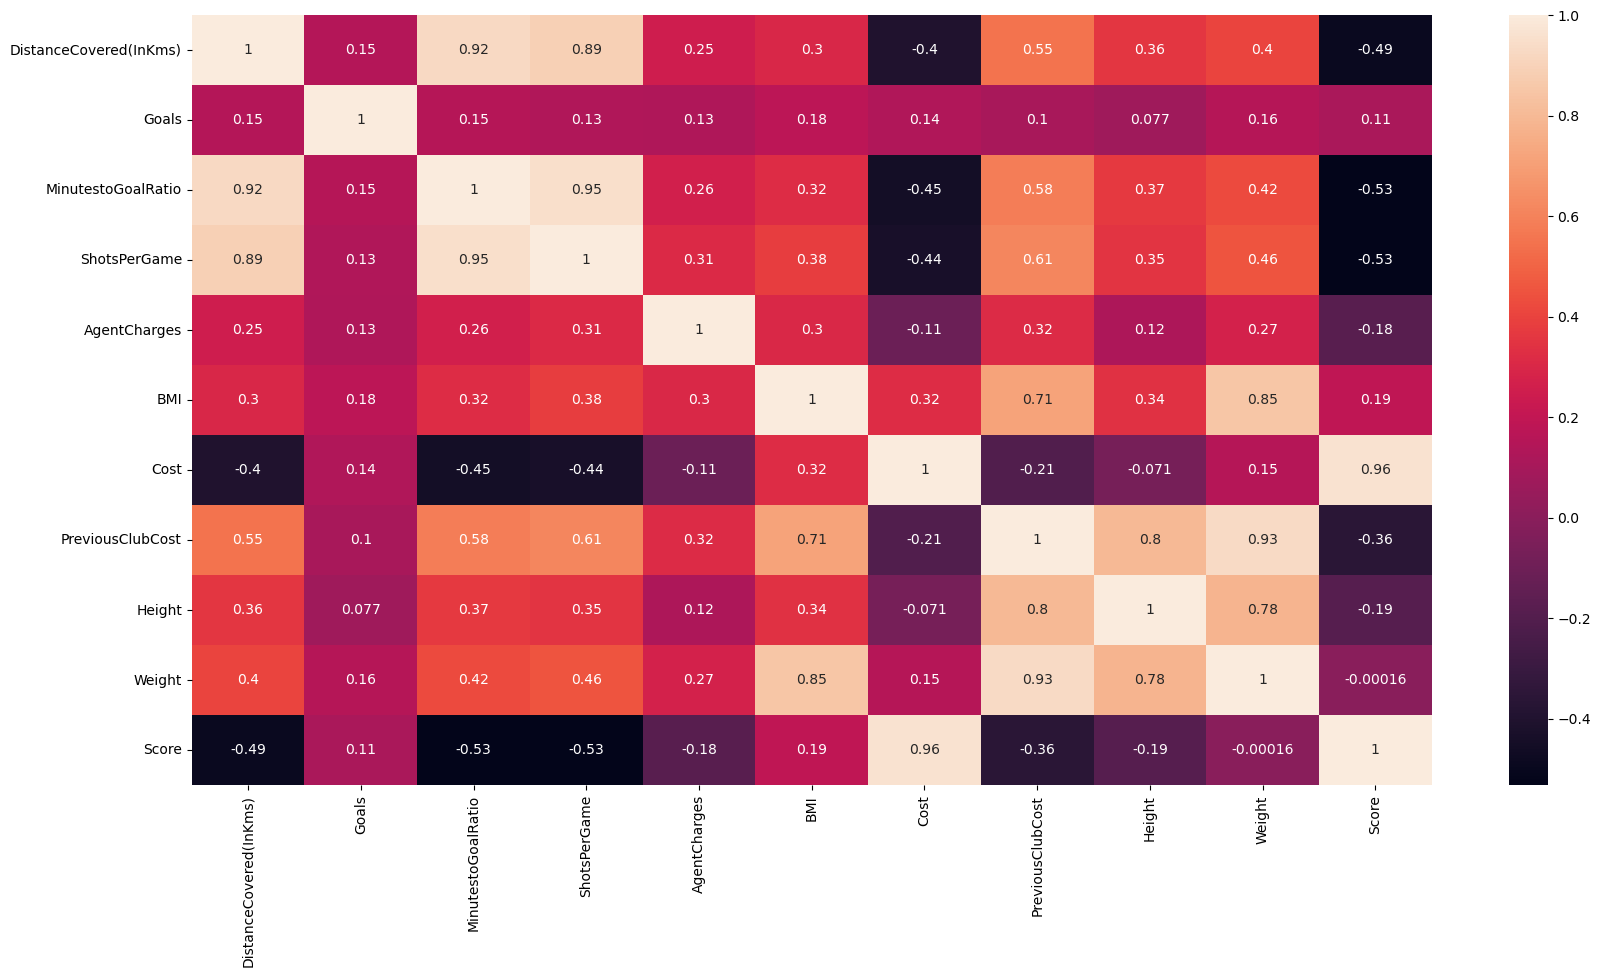

In [9]:
# Plot the heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

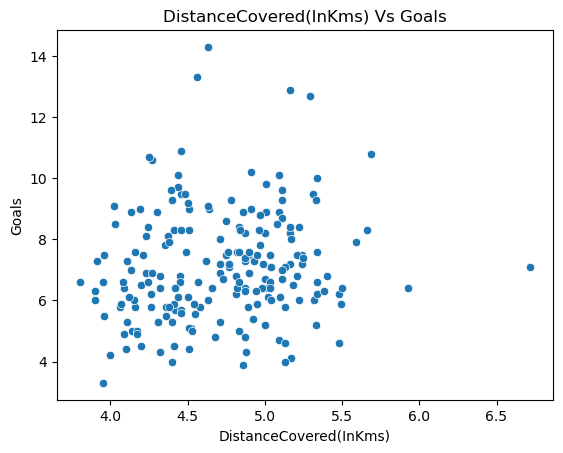

In [10]:
# Plot a scatter plot between Cost and Score, Let x be Cost and y be Score
sns.scatterplot(x="DistanceCovered(InKms)",y="Goals",data=df)
plt.title("DistanceCovered(InKms) Vs Goals")
plt.show()

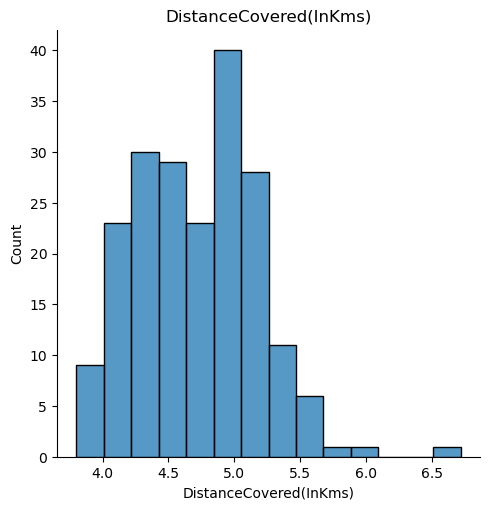

In [11]:
# Plot the displot of Score
sns.displot(df["DistanceCovered(InKms)"])
plt.title("DistanceCovered(InKms)")
plt.show()